<a href="https://colab.research.google.com/github/estefanabermeo/RegresionLineal/blob/main/A6_1_Eua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACTIVIDAD 6.1 REGRESIÓN LINEAL SIMPLE CALIFORNIA EUA**
#### Estefana Bermeo Severiano
#### A01367558

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carga desde un archivo .csv
eua= pd.read_csv("eua_limpio.csv")
eua.head(5)

,ï»¿id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate
0,958.0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/23,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.95,4.88,4.98,4.76,1,1,0,0,2.31,1.0
1,5858.0,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/23,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.89,4.85,4.77,4.68,1,1,0,0,0.66,0.8
2,8142.0,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/23,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.78,4.67,4.67,13,0,13,0,0.09,1.0
3,8339.0,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/23,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,--,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,4.94,5.00,4.94,4.75,2,2,0,0,0.17,1.0
4,8739.0,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/23,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.95,4.96,4.93,4.74,2,0,2,0,4.65,1.0


# **Primer tipo de habitación = Private room**

In [3]:
filtro1_eua = eua.loc[eua['room_type'] == "Private room"]
filtro1_eua

,ï»¿id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate
2,8.142000e+03,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/23,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.78,4.67,4.67,13,0,13,0,0.09,1.0
4,8.739000e+03,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/23,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.95,4.96,4.93,4.74,2,0,2,0,4.65,1.0
6,4.909310e+05,https://www.airbnb.com/rooms/490931,2.020000e+13,06/03/23,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",https://a0.muscache.com/pictures/5841012/ee765...,1269188,...,4.70,4.78,4.77,4.66,1,0,1,0,0.74,1.0
7,1.053700e+04,https://www.airbnb.com/rooms/10537,2.020000e+13,06/03/23,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,--,https://a0.muscache.com/pictures/miso/Hosting-...,36752,...,4.86,5.00,4.14,4.46,2,0,2,0,0.12,1.0
11,1.449780e+05,https://www.airbnb.com/rooms/144978,2.020000e+13,06/03/23,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,--,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4.86,4.81,4.82,4.67,9,4,5,0,0.85,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,8.170000e+17,https://www.airbnb.com/rooms/817390268252267687,2.020000e+13,06/03/23,city scrape,Charming hotel room in downtown,Enjoy easy access to popular shops and restaur...,Russian Hill is directly to the north (and sli...,https://a0.muscache.com/pictures/miso/Hosting-...,486687635,...,5.00,5.00,5.00,5.00,26,0,26,0,1.00,1.0
6929,8.180000e+17,https://www.airbnb.com/rooms/817686120681200035,2.020000e+13,06/03/23,city scrape,SF Spacious Room w/Kitchen/Patio/ComfyBed/Laundry,Our home is carefully designed for long-term s...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,226555948,...,0.00,0.00,0.00,0.00,14,3,11,0,0.00,1.0
6930,8.180000e+17,https://www.airbnb.com/rooms/818185441952600448,2.020000e+13,06/03/23,city scrape,# F - Convenient Potrero Hill Stay. Book Today.,Convenient Stay. Book Potrero Hill Today.<br /...,--,https://a0.muscache.com/pictures/miso/Hosting-...,286802480,...,0.00,0.00,0.00,0.00,6,0,6,0,0.00,1.0
6933,8.180000e+17,https://www.airbnb.com/rooms/818396267693629070,2.020000e+13,06/03/23,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,--,https://a0.muscache.com/pictures/miso/Hosting-...,499294716,...,0.00,0.00,0.00,0.00,1,0,1,0,0.00,0.0


## **Regresión 1**

X = host_response_rate

y= host_acceptance_rate

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

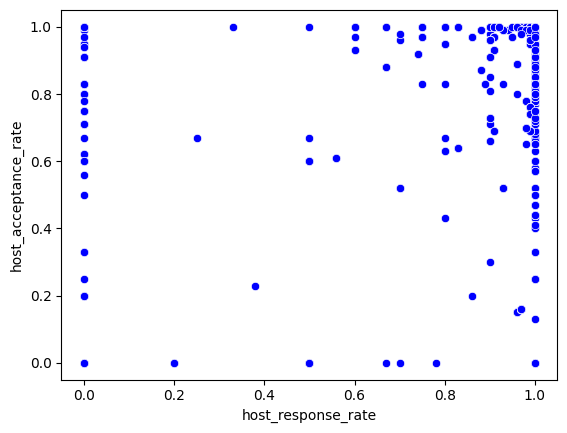

In [4]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1_eua)

In [5]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1_eua[['host_response_rate']]
Var_Dep= filtro1_eua['host_acceptance_rate']

In [6]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [7]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [8]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [9]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.73408963]),
 'rank_': 1,
 'singular_': array([18.6491753]),
 'intercept_': 0.1964043107585305}

**Modelo matemático: y= 0.73408963x + 0.1964043107585305**

---

In [10]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.5963243998147931

In [11]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7722204347301314

## **Regresión 2**

X = price

y= host_acceptance_rate

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

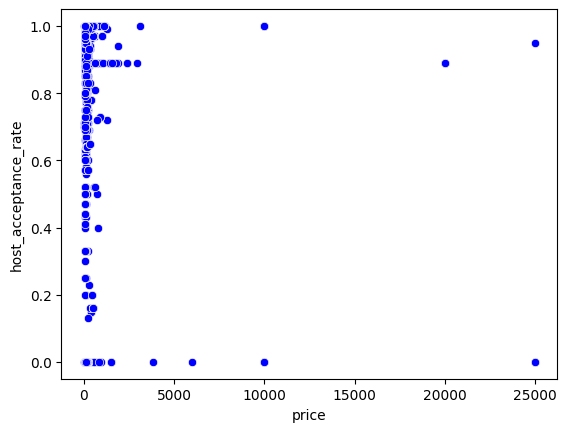

In [12]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=filtro1_eua)

In [13]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= filtro1_eua[['price']]
Var_Dep2= filtro1_eua['host_acceptance_rate']

In [14]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [15]:
#Verificamos la función relacionada al modelo
type(model2)

sklearn.linear_model._base.LinearRegression

In [16]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [17]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.60437173e-06]),
 'rank_': 1,
 'singular_': array([97252.31505148]),
 'intercept_': 0.7764454837639937}

**Modelo matemático: y= -4.60437173e-06x + 0.7764454837639937**

---

In [18]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.0006379781398162532

In [19]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.0252582291504423

## **Regresión 3**

X = number_of_reviews

y= host_acceptance_rate

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

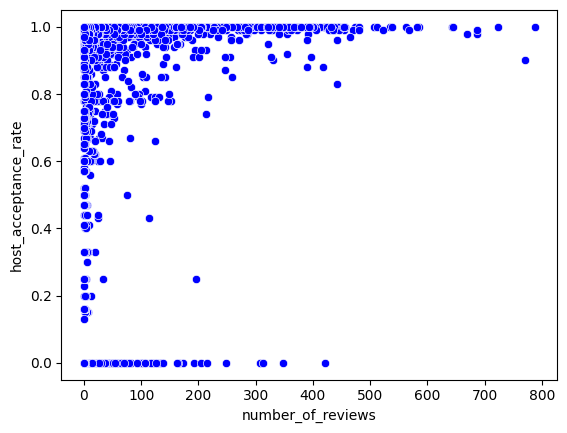

In [20]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro1_eua)

In [21]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep3= filtro1_eua[['number_of_reviews']]
Var_Dep3= filtro1_eua['host_acceptance_rate']

In [22]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [23]:
#Verificamos la función relacionada al modelo
type(model3)

sklearn.linear_model._base.LinearRegression

In [24]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Var_Dep3)

LinearRegression()

In [25]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00077924]),
 'rank_': 1,
 'singular_': array([4963.93141039]),
 'intercept_': 0.7305066557520314}

**Modelo matemático: y=0.00077924x + 0.7305066557520314**


---

In [26]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.047605395563667496

In [27]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.2181866072050883

## **Regresión 4**

X = review_scores_cleanliness

y= review_scores_location

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

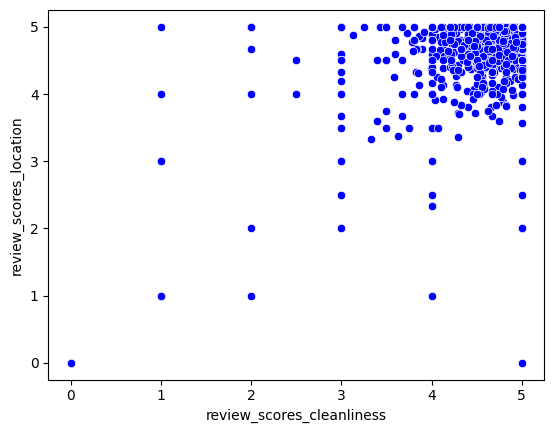

In [28]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro1_eua)

In [29]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep4= filtro1_eua[['review_scores_cleanliness']]
Var_Dep4= filtro1_eua['review_scores_location']

In [30]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [31]:
#Verificamos la función relacionada al modelo
type(model4)

sklearn.linear_model._base.LinearRegression

In [32]:
#Ajustamos el modelo con las variables antes declaradas
model4.fit(X=Vars_Indep4, y=Var_Dep4)

LinearRegression()

In [33]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.97866682]),
 'rank_': 1,
 'singular_': array([91.74918226]),
 'intercept_': 0.11935559644513294}

**Modelo matemático: y=0.97866682x + 0.11935559644513294**


---

In [34]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.9506151120507869

In [35]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.9749949292436279

## **Regresión 5**

X = number_of_reviews

y= availability_365

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

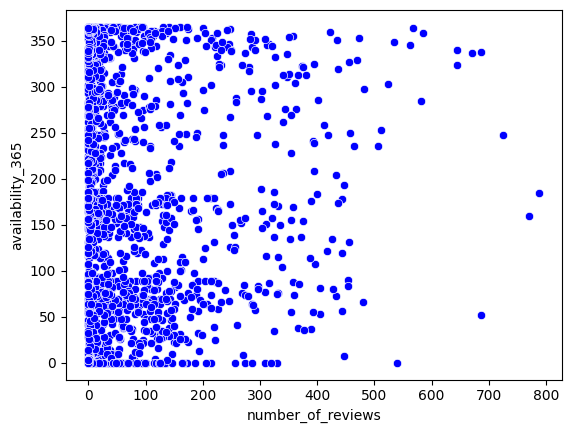

In [36]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro1_eua)

In [37]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep5= filtro1_eua[['number_of_reviews']]
Var_Dep5= filtro1_eua['availability_365']

In [38]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [39]:
#Verificamos la función relacionada al modelo
type(model5)

sklearn.linear_model._base.LinearRegression

In [40]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Var_Dep5)

LinearRegression()

In [41]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00252966]),
 'rank_': 1,
 'singular_': array([4963.93141039]),
 'intercept_': 177.4508942427995}

**Modelo matemático: y= -0.00252966x + 177.4508942427995**


---

In [42]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

3.6539619377995436e-06

In [43]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.0019115339227436022

## **Regresión 6**

X = review_scores_communication

y= reviews_per_month

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

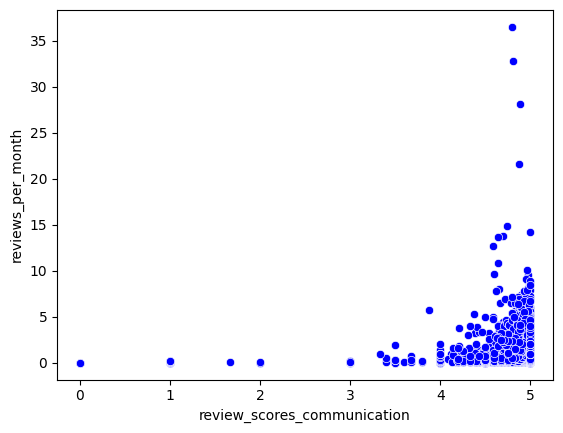

In [44]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro1_eua)

In [45]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep6= filtro1_eua[['reviews_per_month']]
Var_Dep6= filtro1_eua['review_scores_communication']

In [46]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [47]:
#Verificamos la función relacionada al modelo
type(model6)

sklearn.linear_model._base.LinearRegression

In [48]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Var_Dep6)

LinearRegression()

In [49]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.26716222]),
 'rank_': 1,
 'singular_': array([101.22246683]),
 'intercept_': 3.5886302964317647}

**Modelo matemático: y= 0.26716222x + 3.5886302964317647**


---

In [50]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.08436882675870583

In [51]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.29046312461086315

# **Segundo tipo de habitación = Hotel room**

In [52]:
filtro2_eua = eua.loc[eua['room_type'] == "Hotel room"]
filtro2_eua

,ï»¿id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate
711,4631873.0,https://www.airbnb.com/rooms/4631873,2.020000e+13,06/03/23,city scrape,Hotel Pac Hgts Queen Free Car ParkB,Please Instant Book. Need Valid Photo ID.<br /...,--,https://a0.muscache.com/pictures/81807138/12b3...,20850212,...,4.89,4.82,4.88,4.63,16,0,14,0,3.51,0.99
787,6169292.0,https://www.airbnb.com/rooms/6169292,2.020000e+13,06/03/23,city scrape,Hotel Pac Hgts 2 Bed Free Car ParkA,Please Instant Book. Need Valid Photo ID to ch...,--,https://a0.muscache.com/pictures/76888501/8774...,20850212,...,4.84,4.73,4.84,4.39,16,0,14,0,2.78,0.99
938,6883183.0,https://www.airbnb.com/rooms/6883183,2.020000e+13,06/03/23,city scrape,Elegant Union Square hotel room,"The Club Donatello is a four-star, Gold Crown,...",The Donatello Hotel is perfectly located one b...,https://a0.muscache.com/pictures/87115624/a239...,23593310,...,4.94,4.97,5.00,4.91,1,0,0,0,0.37,1.00
1704,16001051.0,https://www.airbnb.com/rooms/16001051,2.020000e+13,06/03/23,city scrape,"Cozy Private Room - Mini Fridge, Fast WiFi, TV",YouÃ¢â¬â¢ll love my place because of the loc...,My place is located conveniently in the middle...,https://a0.muscache.com/pictures/miso/Hosting-...,103884979,...,4.71,4.59,3.88,4.29,14,0,7,0,0.24,0.99
2229,23271377.0,https://www.airbnb.com/rooms/23271377,2.020000e+13,06/03/23,city scrape,Stratford Cozy Queen,For our soft opening we have decided to give A...,In the Heart of Union Square Shopping district!,https://a0.muscache.com/pictures/miso/Hosting-...,173206762,...,4.63,4.50,4.75,4.13,61,0,50,0,0.17,0.80
2230,23271459.0,https://www.airbnb.com/rooms/23271459,2.020000e+13,06/03/23,city scrape,Stratford Cozy Cool Queen,For our soft opening we have decided to give A...,--,https://a0.muscache.com/pictures/miso/Hosting-...,173206762,...,5.00,5.00,5.00,4.00,61,0,50,0,0.06,0.80
2246,23551086.0,https://www.airbnb.com/rooms/23551086,2.020000e+13,06/03/23,city scrape,Stratford Cozy Queen,For our soft opening we have decided to give A...,In the Heart of Union Square Shopping district!,https://a0.muscache.com/pictures/miso/Hosting-...,173206762,...,4.94,4.67,5.00,4.58,61,0,50,0,0.54,0.80
2247,23551138.0,https://www.airbnb.com/rooms/23551138,2.020000e+13,06/03/23,city scrape,Stratford Cozy Queen,For our soft opening we have decided to give A...,In the Heart of Union Square Shopping district!,https://a0.muscache.com/pictures/miso/Hosting-...,173206762,...,4.95,4.62,5.00,4.48,61,0,50,0,0.35,0.80
2248,23551287.0,https://www.airbnb.com/rooms/23551287,2.020000e+13,06/03/23,city scrape,Stratford Cozy Cool Queen,For our soft opening we have decided to give A...,--,https://a0.muscache.com/pictures/miso/Hosting-...,173206762,...,4.89,4.47,5.00,4.16,61,0,50,0,0.31,0.80
2252,23551835.0,https://www.airbnb.com/rooms/23551835,2.020000e+13,06/03/23,city scrape,Stratford Cozy Cool Queen,For our soft opening we have decided to give A...,--,https://a0.muscache.com/pictures/miso/Hosting-...,173206762,...,4.81,4.88,4.88,4.38,61,0,50,0,0.43,0.80


## **Regresión a**

X = host_response_rate

y= host_acceptance_rate

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

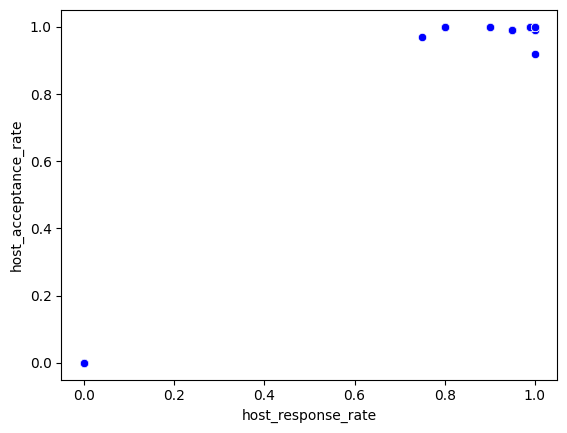

In [53]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro2_eua)

In [54]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepa= filtro2_eua[['host_response_rate']]
Var_Depa= filtro2_eua['host_acceptance_rate']

In [55]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modela= LinearRegression()

In [56]:
#Verificamos la función relacionada al modelo
type(modela)

sklearn.linear_model._base.LinearRegression

In [57]:
#Ajustamos el modelo con las variables antes declaradas
modela.fit(X=Vars_Indepa, y=Var_Depa)

LinearRegression()

In [58]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modela.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.02523785]),
 'rank_': 1,
 'singular_': array([2.58350537]),
 'intercept_': 0.0381930481684023}

**Modelo matemático: y= 1.02523785x + 0.0381930481684023**

---

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Detera=modela.score(X=Vars_Indepa, y=Var_Depa)
coef_Detera

0.951897521440099

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correla=np.sqrt(coef_Detera)
coef_Correla

0.9756523568567336

## **Regresión b**

X = price

y= host_acceptance_rate

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

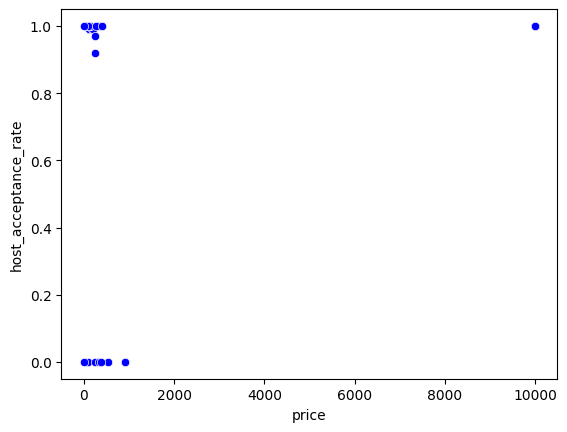

In [61]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=filtro2_eua)

In [62]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepb= filtro2_eua[['price']]
Var_Depb= filtro2_eua['host_acceptance_rate']

In [63]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelb= LinearRegression()

In [64]:
#Verificamos la función relacionada al modelo
type(modelb)

sklearn.linear_model._base.LinearRegression

In [65]:
#Ajustamos el modelo con las variables antes declaradas
modelb.fit(X=Vars_Indepb, y=Var_Depb)

LinearRegression()

In [66]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelb.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.37986599e-05]),
 'rank_': 1,
 'singular_': array([18888.09646464]),
 'intercept_': 0.8094552245787601}

**Modelo matemático: y= 1.37986599e-05x + 0.8094552245787601**

---

In [67]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deterb=modelb.score(X=Vars_Indepb, y=Var_Depb)
coef_Deterb

0.009216635348141544

In [68]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correlb=np.sqrt(coef_Deterb)
coef_Correlb

0.09600330904787367

## **Regresión c**

X = number_of_reviews

y= host_acceptance_rate

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

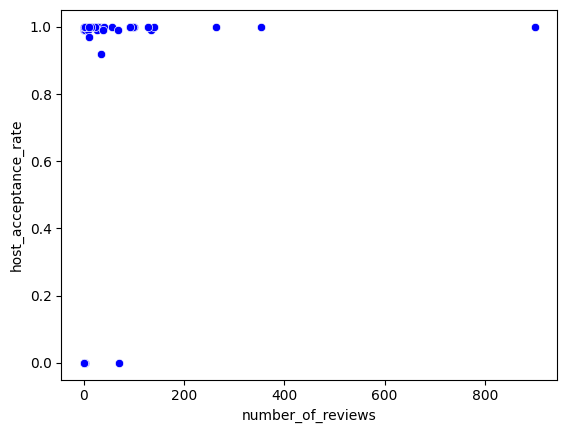

In [69]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro2_eua)

In [70]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepc= filtro2_eua[['number_of_reviews']]
Var_Depc= filtro2_eua['host_acceptance_rate']

In [71]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelc= LinearRegression()

In [72]:
#Verificamos la función relacionada al modelo
type(modelc)

sklearn.linear_model._base.LinearRegression

In [73]:
#Ajustamos el modelo con las variables antes declaradas
modelc.fit(X=Vars_Indepc, y=Var_Depc)

LinearRegression()

In [74]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelc.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00046365]),
 'rank_': 1,
 'singular_': array([975.14251424]),
 'intercept_': 0.7962857128180519}

**Modelo matemático: y=0.00046365x + 0.7962857128180519**


---

In [75]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deterc=modelc.score(X=Vars_Indepc, y=Var_Depc)
coef_Deterc

0.027736171539034737

In [76]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correlc=np.sqrt(coef_Deterc)
coef_Correlc

0.16654180117626546

## **Regresión d**

X = review_scores_cleanliness

y= review_scores_location

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

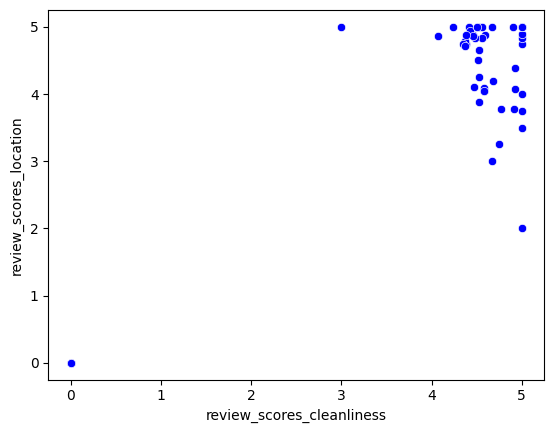

In [77]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro2_eua)

In [78]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepd= filtro2_eua[['review_scores_cleanliness']]
Var_Depd= filtro2_eua['review_scores_location']

In [79]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modeld= LinearRegression()

In [80]:
#Verificamos la función relacionada al modelo
type(modeld)

sklearn.linear_model._base.LinearRegression

In [81]:
#Ajustamos el modelo con las variables antes declaradas
modeld.fit(X=Vars_Indepd, y=Var_Depd)

LinearRegression()

In [82]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modeld.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.869787]),
 'rank_': 1,
 'singular_': array([9.23831518]),
 'intercept_': 0.4241255362221179}

**Modelo matemático: y= 0.869787x + 0.4241255362221179**


---

In [83]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deterd=modeld.score(X=Vars_Indepd, y=Var_Depd)
coef_Deterd

0.685443264649231

In [84]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correld=np.sqrt(coef_Deterd)
coef_Correld

0.8279150105229588

## **Regresión e**

X = number_of_reviews

y= availability_365

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

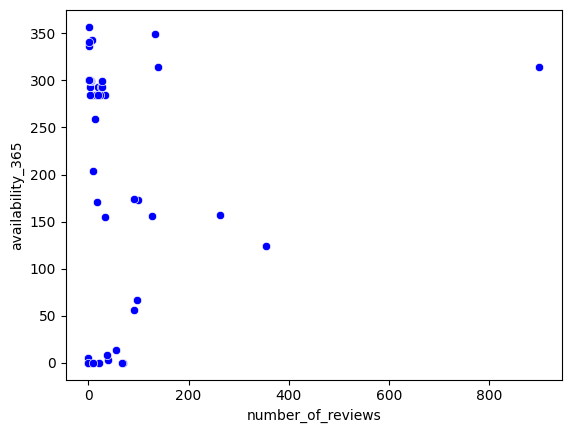

In [85]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro2_eua)

In [86]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepe= filtro2_eua[['number_of_reviews']]
Var_Depe= filtro2_eua['availability_365']

In [87]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modele= LinearRegression()

In [88]:
#Verificamos la función relacionada al modelo
type(modele)

sklearn.linear_model._base.LinearRegression

In [89]:
#Ajustamos el modelo con las variables antes declaradas
modele.fit(X=Vars_Indepe, y=Var_Depe)

LinearRegression()

In [90]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modele.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.10665693]),
 'rank_': 1,
 'singular_': array([975.14251424]),
 'intercept_': 167.77747368533454}

**Modelo matemático: y= 0.10665693x + 167.77747368533454**


---

In [91]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Detere=modele.score(X=Vars_Indepe, y=Var_Depe)
coef_Detere

0.01122457035412916

In [92]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correle=np.sqrt(coef_Detere)
coef_Correle

0.10594607285845549

## **Regresión f**

X = review_scores_communication

y= reviews_per_month

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

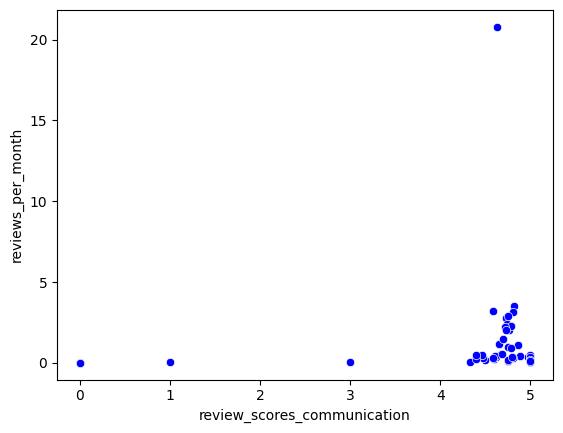

In [93]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro2_eua)

In [94]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepf= filtro2_eua[['reviews_per_month']]
Var_Depf= filtro2_eua['review_scores_communication']

In [95]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelf= LinearRegression()

In [96]:
#Verificamos la función relacionada al modelo
type(modelf)

sklearn.linear_model._base.LinearRegression

In [97]:
#Ajustamos el modelo con las variables antes declaradas
modelf.fit(X=Vars_Indepf, y=Var_Depf)

LinearRegression()

In [98]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelf.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.05632027]),
 'rank_': 1,
 'singular_': array([21.07379356]),
 'intercept_': 4.2191430729294765}

**Modelo matemático: y= 0.05632027x + 4.2191430729294765**


---

In [99]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deterf=modelf.score(X=Vars_Indepf, y=Var_Depf)
coef_Deterf

0.014418582378406652

In [100]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correlf=np.sqrt(coef_Deterf)
coef_Correlf

0.12007740161415324

# **Tabla de Coeficientes**

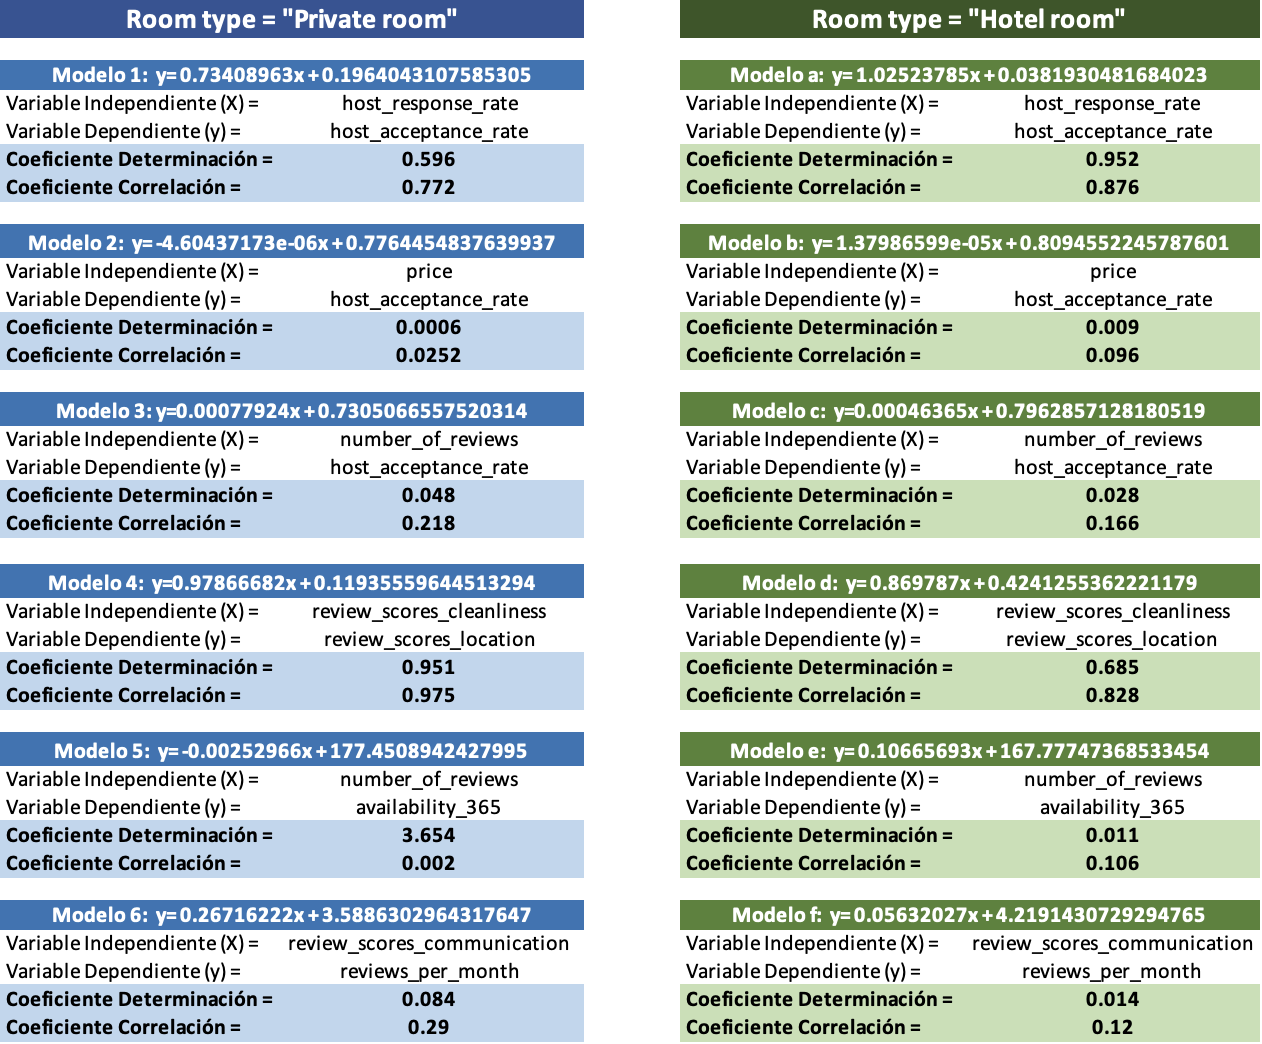